In [1]:
import numpy as np 
import matplotlib.pylab as plt
from getdist import plots, MCSamples
import getdist
import pandas as pd
import glob
import sys
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# our script
import utils.helpers as hp
import utils.statistics as us

fontSize = 20

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})

settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3}
np.set_printoptions(precision=3)

# boot means bootstrap below, that is, random samples of n(z)

In [2]:
suffix = 'BHM_5000_Random_Mean_Set_2'

### Columns in MontePython Likelihood

In [3]:
# 0 omega_cdm
# 1 ln10^{10}A_s
# 2 omega_b
# 3 n_s
# 4 h
# 5 A_IA
# 6 c_min
# 7 dc
# 8 Ac
# Omega_m
# sigma8

### Using Mean of $n(z)$

In [4]:
path = '/home/harry/Desktop/KV-450-MP-Samples/KV-450-Bayes-Mean-Set-2/'
fnames = '2022-03-05_35000__*'

In [5]:
mean_samples = []
for file in glob.glob(path+fnames):
    mean_samples.append(np.loadtxt(file))

In [6]:
mean_samples = np.concatenate(mean_samples)[:,2:]
cols = [0, 1, 2, 3, 4, 5, 7, 8, 6]
m_samples = mean_samples[:,cols]
m_samples[:,-3] *= 1E4 

### Using Random Samples of $n(z)$

In [7]:
path = '/home/harry/Desktop/MontePython-V3.4/chains/KV-450-Bayes-Random-5000/'
fnames = '2022-02-18_35000__*'

In [8]:
samples = []
for file in glob.glob(path+fnames):
    samples.append(np.loadtxt(file))

In [9]:
samples = np.concatenate(samples)[:,2:]
boot_samples = samples[:,cols]
boot_samples[:,-3] *= 1E4 

### Labels

In [10]:
labels = [r'$\Omega_{\textrm{cdm}}h^{2}$',
          r'$\textrm{ln}10^{10}A_{s}$',
          r'$\Omega_{\textrm{b}}h^{2}$',
          r'$n_{s}$',
          r'$h$',
          r'$A_{\textrm{IA}}$', 
          r'$10^{4}\,\delta c$', 
          r'$A_{c}$',
          r'$c_{\textrm{min}}$']

ndim = len(labels)
names = ["x%s"%i for i in range(ndim)]

label_mean = r'Mean of $n(z)$ Set 2'
label_random = r'Samples of $n(z)$'

samples_mean = MCSamples(samples=m_samples,names = names, labels = labels, settings = settings, label=label_mean)
samples_random = MCSamples(samples=boot_samples,names = names, labels = labels, settings = settings, label=label_random)

Removed no burn in
Removed no burn in


In [11]:
us.summary(m_samples, labels, 1)

Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{cdm}}h^{2}$             :  0.145 ± (0.049, 0.051)
$\textrm{ln}10^{10}A_{s}$                :  2.507 ± (0.930, 0.571)
$\Omega_{\textrm{b}}h^{2}$               :  0.022 ± (0.003, 0.002)
$n_{s}$                                  :  1.009 ± (0.156, 0.151)
$h$                                      :  0.744 ± (0.052, 0.064)
$A_{\textrm{IA}}$                        : -0.685 ± (0.463, 0.521)
$10^{4}\,\delta c$                       : -0.003 ± (2.047, 1.994)
$A_{c}$                                  :  1.025 ± (0.131, 0.131)
$c_{\textrm{min}}$                       :  2.522 ± (0.367, 0.333)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{cdm}}h^{2}$             :  0.145 ± (0.049, 0.051)
$\textrm{ln}10^{10}A_{s}$                :  2.659 ± (0.777, 0.724)
$\Omega_{\textrm{b}}h^{2}$               :  0.022 ± (0.002, 0.002)
$

In [12]:
us.summary(boot_samples, labels, 1)

Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{cdm}}h^{2}$             :  0.137 ± (0.053, 0.050)
$\textrm{ln}10^{10}A_{s}$                :  2.695 ± (1.015, 0.680)
$\Omega_{\textrm{b}}h^{2}$               :  0.022 ± (0.002, 0.002)
$n_{s}$                                  :  1.012 ± (0.150, 0.156)
$h$                                      :  0.743 ± (0.052, 0.062)
$A_{\textrm{IA}}$                        : -0.478 ± (0.484, 0.519)
$10^{4}\,\delta c$                       :  0.033 ± (1.994, 1.997)
$A_{c}$                                  :  1.022 ± (0.130, 0.132)
$c_{\textrm{min}}$                       :  2.506 ± (0.369, 0.327)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{cdm}}h^{2}$             :  0.138 ± (0.051, 0.052)
$\textrm{ln}10^{10}A_{s}$                :  2.839 ± (0.871, 0.823)
$\Omega_{\textrm{b}}h^{2}$               :  0.022 ± (0.002, 0.002)
$

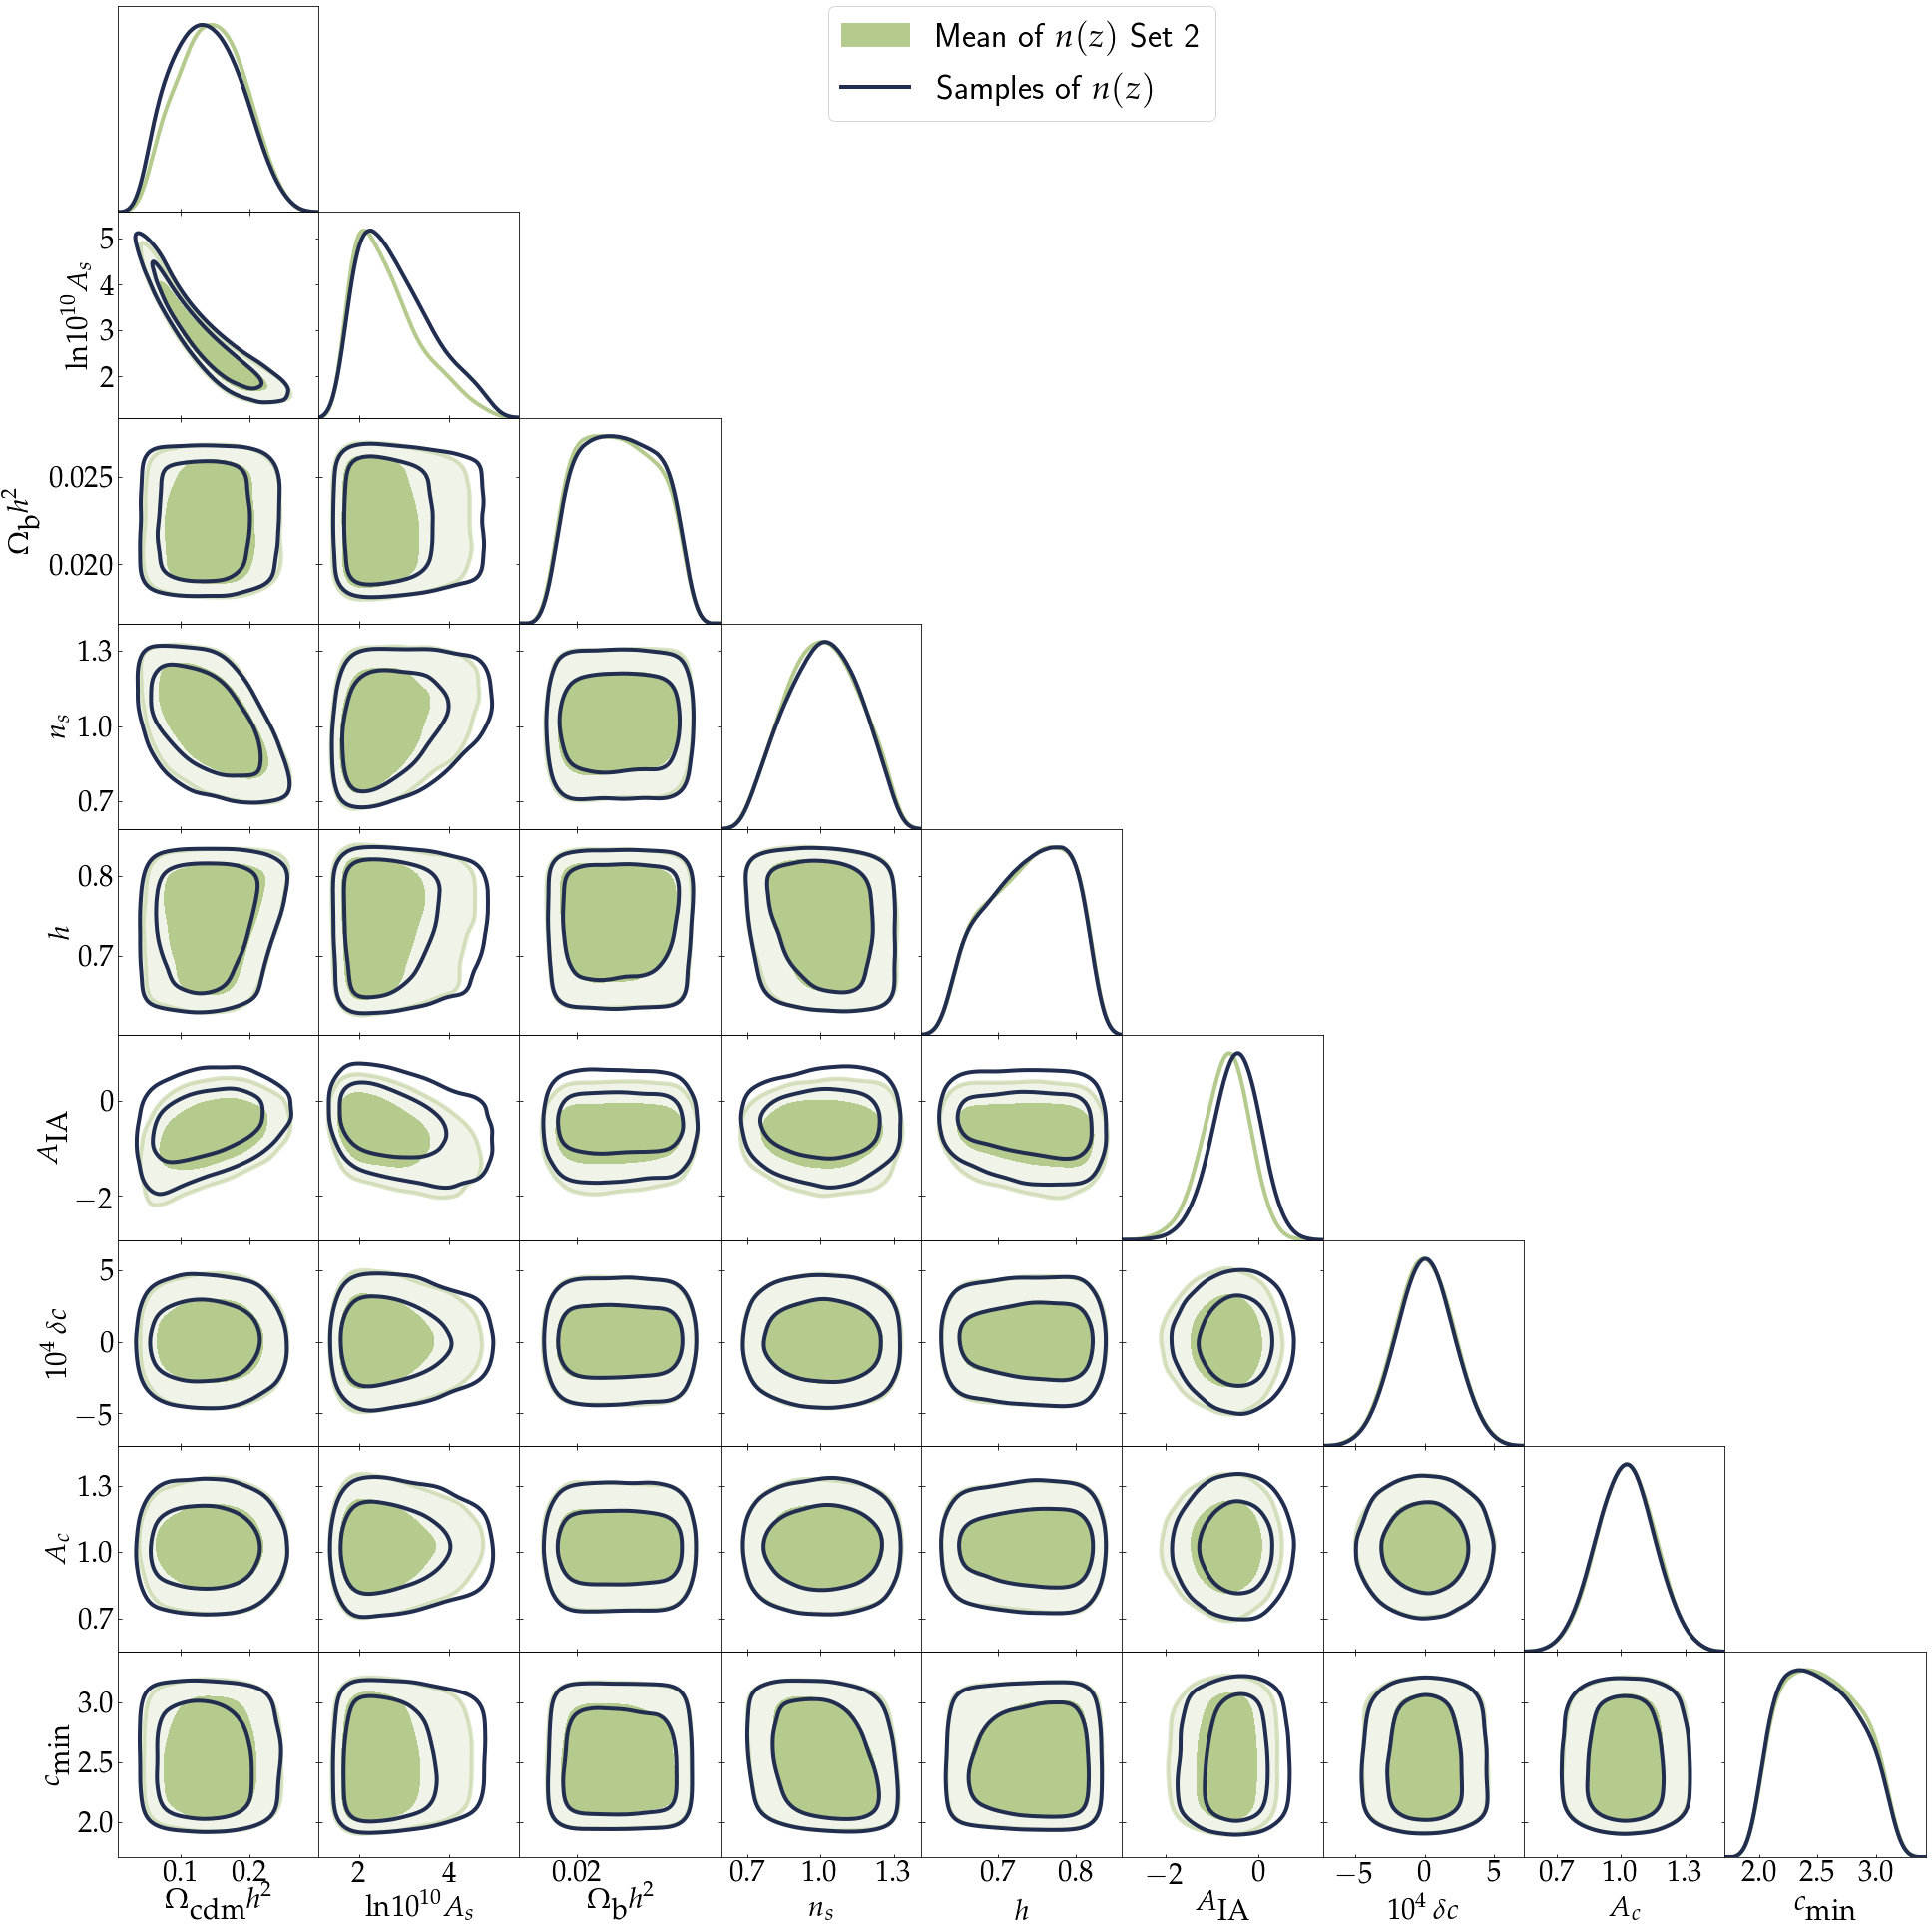

In [13]:
c1 = '#B5CA8D'
c3 = '#222E50'
alpha = 0.7
contours = np.array([0.68,0.95])

G = plots.getSubplotPlotter(subplot_size=3)
G.settings.solid_contour_palefactor = 0.8
G.settings.alpha_filled_add = alpha
G.settings.num_plot_contours = 2
G.settings.lw_contour = 5
G.settings.axes_fontsize = 30
G.settings.lab_fontsize = 30
G.settings.fontsize = 35 # important for padding in x-axis 
G.settings.legend_fontsize = 35
samples_mean.updateSettings({'contours': [0.68, 0.95]})
samples_random.updateSettings({'contours': [0.68, 0.95]})
G.triangle_plot([samples_mean, samples_random], filled = [True,False], contour_colors=[c1, c3], contour_lws=[4,4], contour_ls=['-', '-'])
plt.savefig('plots/triangle_plot_mp_'+suffix+'.pdf', transparent = False, bbox_inches = 'tight') 
plt.show()

### 2D Plot

In [14]:
sigma_8_om_mean = mean_samples[:,[-2,-1]] 
sigma_8_om_random = samples[:,[-2,-1]]

In [15]:
# number of dimensions for plotting
ndim = 2

# some names for the parameters
names = ["x%s"%i for i in range(ndim)]
labels = [r'$\Omega_{\textrm{m}}$', r'$\sigma_{8}$']

mean_plot_sig = MCSamples(samples=sigma_8_om_mean,names = names, labels = labels, settings = settings)
random_plot_sig = MCSamples(samples=sigma_8_om_random,names = names, labels = labels, settings = settings)

Removed no burn in
Removed no burn in


In [16]:
us.summary(sigma_8_om_mean, labels, 1)

Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.310 ± (0.092, 0.097)
$\sigma_{8}$                             :  0.728 ± (0.168, 0.101)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.310 ± (0.092, 0.097)
$\sigma_{8}$                             :  0.756 ± (0.141, 0.128)


In [17]:
us.summary(sigma_8_om_random, labels, 1)

Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.293 ± (0.102, 0.095)
$\sigma_{8}$                             :  0.772 ± (0.186, 0.125)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.298 ± (0.097, 0.100)
$\sigma_{8}$                             :  0.797 ± (0.161, 0.150)


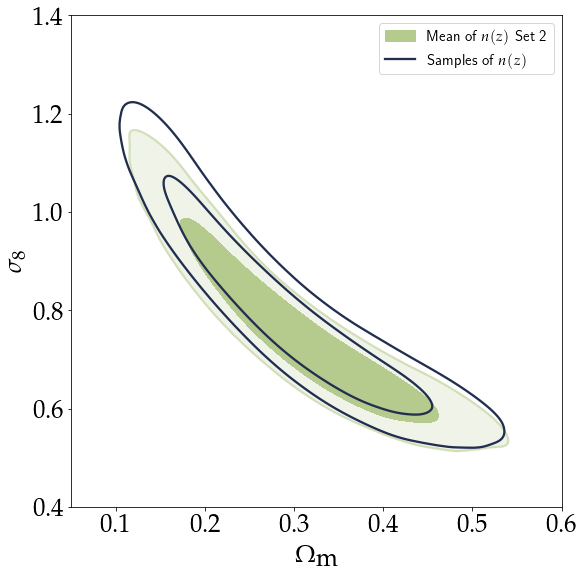

In [18]:
G = plots.getSinglePlotter(width_inch=8, ratio=1)
G.settings.num_plot_contours = 2
G.settings.lw_contour = 1
G.settings.axes_fontsize = 25
G.settings.lab_fontsize = 25
G.settings.fontsize = 25 # important for padding in x-axis 
G.settings.solid_contour_palefactor = 0.8
G.settings.alpha_filled_add = alpha
G.settings.legend_fontsize = 15
mean_plot_sig.updateSettings({'contours': [0.68, 0.95]})
random_plot_sig.updateSettings({'contours': [0.68, 0.95]})
G.plot_2d([mean_plot_sig, random_plot_sig], 'x0', 'x1', filled=[True, False], colors=['#B5CA8D', '#222E50'])
G.add_legend([label_mean, label_random], legend_loc='upper right');
plt.xlim(0.05, 0.60)
plt.ylim(0.40, 1.40)
plt.savefig('plots/sigma_8_Omega_Matter_mp_'+suffix+'.pdf', transparent = False, bbox_inches = 'tight') 
plt.show()

### Calculate $S_{8}$

$$
S_{8}\equiv\sigma_{8}\sqrt{\frac{\Omega_{\textrm{m}}}{0.3}}
$$

In [19]:
S_8_mean = sigma_8_om_mean[:,1] * np.sqrt(sigma_8_om_mean[:,0]/0.3)
S_8_random = sigma_8_om_random[:,1] * np.sqrt(sigma_8_om_random[:,0]/0.3)

In [20]:
n_mean = S_8_mean.shape[0]
n_random = S_8_random.shape[0]

In [21]:
samples_2d_mean = np.concatenate((sigma_8_om_mean[:,0].reshape(n_mean, 1), S_8_mean.reshape(n_mean, 1)), axis = 1)
samples_2d_random = np.concatenate((sigma_8_om_random[:,0].reshape(n_random, 1), S_8_random.reshape(n_random, 1)), axis = 1)

### Load Planck Chain

In [22]:
folder = '/home/harry/Desktop/Planck/base/plikHM_TTTEEE_lowl_lowE/'

c1 = np.loadtxt(folder + 'base_plikHM_TTTEEE_lowl_lowE_1.txt')
c2 = np.loadtxt(folder + 'base_plikHM_TTTEEE_lowl_lowE_2.txt')
c3 = np.loadtxt(folder + 'base_plikHM_TTTEEE_lowl_lowE_3.txt')
c4 = np.loadtxt(folder + 'base_plikHM_TTTEEE_lowl_lowE_4.txt')

s1 = np.array([c1[:,31], c1[:,36]]).T
s2 = np.array([c2[:,31], c2[:,36]]).T
s3 = np.array([c3[:,31], c3[:,36]]).T
s4 = np.array([c4[:,31], c4[:,36]]).T

samples_planck = np.concatenate([s1, s2, s3, s4])

### 2D Plot

In [23]:
# number of dimensions for plotting
ndim = 2

# some names for the parameters
names = ["x%s"%i for i in range(ndim)]
labels = [r'$\Omega_{\textrm{m}}$', r'$S_{8}$']


mean_plot = MCSamples(samples=samples_2d_mean,names = names, labels = labels, settings = settings)
random_plot = MCSamples(samples=samples_2d_random,names = names, labels = labels, settings = settings)
plan_plot = MCSamples(samples=samples_planck,names = names, labels = labels, settings = settings)

Removed no burn in
Removed no burn in
Removed no burn in


In [24]:
us.summary(samples_2d_mean, labels, 1)

Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.310 ± (0.092, 0.097)
$S_{8}$                                  :  0.743 ± (0.036, 0.039)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.310 ± (0.092, 0.097)
$S_{8}$                                  :  0.742 ± (0.037, 0.038)


In [25]:
us.summary(samples_2d_random, labels, 1)

Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.293 ± (0.102, 0.095)
$S_{8}$                                  :  0.763 ± (0.040, 0.041)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.298 ± (0.097, 0.100)
$S_{8}$                                  :  0.762 ± (0.040, 0.040)


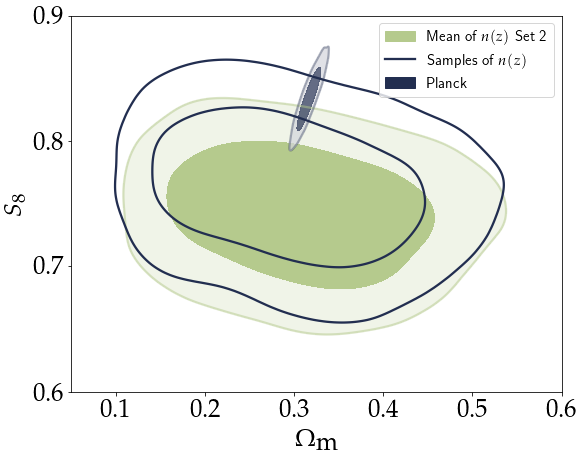

In [26]:
G = plots.getSinglePlotter(width_inch=8, ratio=4 / 5.)
G.settings.num_plot_contours = 2
G.settings.lw_contour = 1
G.settings.axes_fontsize = 25
G.settings.lab_fontsize = 25
G.settings.fontsize = 25 # important for padding in x-axis 
G.settings.solid_contour_palefactor = 0.8
G.settings.alpha_filled_add = alpha
G.settings.legend_fontsize = 15
mean_plot.updateSettings({'contours': [0.68, 0.95]})
random_plot.updateSettings({'contours': [0.68, 0.95]})
G.plot_2d([mean_plot, random_plot, plan_plot], 'x0', 'x1', filled=[True, False, True], colors=['#B5CA8D', '#222E50', '#222E50'])
G.add_legend([label_mean, label_random, 'Planck'], legend_loc='upper right');
plt.xlim(0.05, 0.60)
plt.ylim(0.60, 0.90)
plt.savefig('plots/S8_Omega_Matter_Planck_mp_'+suffix+'.pdf', transparent = False, bbox_inches = 'tight') 
plt.show()